<a href="https://colab.research.google.com/github/renanalencar/projeto-md-emocoes/blob/main/entregas/Assign6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados

In [ ]:
# montar o Google Drive dentro do Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# ler o arquivo processado de tédio
arquivo_tedio = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Assign6/dadosTedioProcessados.xlsx"
df_tedio = pd.read_excel(arquivo_tedio, index_col=0)

# remover as colunas female, male e [p1...p24]
df_tedio = df_tedio.drop(columns=['female', 'male', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
filtro  = df_tedio['game_id'] == 1
df_tedio = df_tedio[filtro]

# visualizar as 8 primeiras entradas do df
df_tedio.head(8)

,game_id,uuid,timestamp,angry,disgusted,fear,sad,surprised,happy
0,1,6,1605708643465,0.034800,0.057187,0.010910,0.125495,0.191988,0.131196
1,1,6,1605708643974,0.040922,0.065980,0.009346,0.123534,0.117035,0.136284
2,1,6,1605708644480,0.029513,0.050042,0.009480,0.120868,0.194130,0.185262
3,1,6,1605708644995,0.037817,0.071314,0.010974,0.166960,0.150470,0.122635
4,1,6,1605708645496,0.040636,0.067900,0.010229,0.137022,0.154919,0.132826
5,1,6,1605708646011,0.024871,0.045830,0.008720,0.153731,0.235671,0.183499
6,1,6,1605708646525,0.042983,0.077609,0.011438,0.175638,0.128352,0.108902
7,1,6,1605708647033,0.037752,0.062227,0.010248,0.155643,0.159876,0.125097


In [ ]:
# verificar o tamanho do df
print("Variáveis:\t {}".format(df_tedio.shape[1]))
print("Entradas:\t {}".format(df_tedio.shape[0]))

Variáveis:	 9
Entradas:	 18278


In [ ]:
# vizualisar os nomes das colunas
df_tedio.columns

Index(['game_id', 'uuid', 'timestamp', 'angry', 'disgusted', 'fear', 'sad',
       'surprised', 'happy'],
      dtype='object')

In [ ]:
# descobrir os tipos das variáveis
df_tedio.dtypes

game_id        int64
uuid           int64
timestamp      int64
angry        float64
disgusted    float64
fear         float64
sad          float64
surprised    float64
happy        float64
dtype: object

## Correlação
De acordo com este [link](https://medium.com/omixdata/estat%C3%ADstica-an%C3%A1lise-de-correla%C3%A7%C3%A3o-usando-python-e-r-d68611511b5a)


*   1 a 0.7 (+ ou -): forte
*   0.7 a 0.5 (+ ou -): moderado
*   0.5 a 0.25 (+ ou -):fraco
*   próximo a 0 (+ ou -): nenhuma


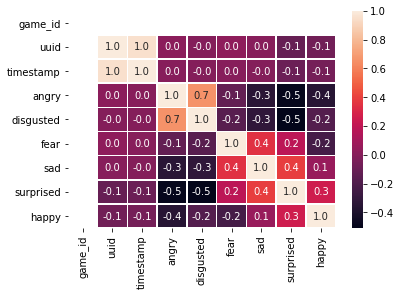

In [ ]:
# análise de correlação
correlation = df_tedio.corr()

# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

No gráfico acima temos:


*   angry x disgusted = 0.7 (forte)
*   angry x surprised = -0.5 (moderado)
*   surprised x disgusted = -0.5 (moderado)
*   surprised x fear = 0.4 (moderado)
*   sad x fear = 0.4 (moderado)

## Criando "classes" para a base de dados
Escolhemos quatro sentimentos que tem forte (*angry* e *disguted*) e moderada (*sad* e *surprised*) correlação.

In [ ]:
# função para classificar os dados como tédio (1) ou estresse (0)
def def_tedio(c):
  if c['angry'] >= 0.1 and c['disgusted'] >= 0.1:
    return 1
  elif c['sad'] >= 0.1 and c['surprised'] >= 0.1:
    return 1
  else:
    return 0

In [ ]:
# criar a coluna 'target' para o df_tedio
df_tratado = pd.DataFrame(df_tedio)

df_tratado['target'] = df_tedio.apply(def_tedio, axis=1)

df_tratado.head(8)

,game_id,uuid,timestamp,angry,disgusted,fear,sad,surprised,happy,target
0,1,6,1605708643465,0.034800,0.057187,0.010910,0.125495,0.191988,0.131196,1
1,1,6,1605708643974,0.040922,0.065980,0.009346,0.123534,0.117035,0.136284,1
2,1,6,1605708644480,0.029513,0.050042,0.009480,0.120868,0.194130,0.185262,1
3,1,6,1605708644995,0.037817,0.071314,0.010974,0.166960,0.150470,0.122635,1
4,1,6,1605708645496,0.040636,0.067900,0.010229,0.137022,0.154919,0.132826,1
5,1,6,1605708646011,0.024871,0.045830,0.008720,0.153731,0.235671,0.183499,1
6,1,6,1605708646525,0.042983,0.077609,0.011438,0.175638,0.128352,0.108902,1
7,1,6,1605708647033,0.037752,0.062227,0.010248,0.155643,0.159876,0.125097,1


In [ ]:
# verificar o tipo de dado de cada coluna
df_tratado.dtypes

game_id        int64
uuid           int64
timestamp      int64
angry        float64
disgusted    float64
fear         float64
sad          float64
surprised    float64
happy        float64
target         int64
dtype: object

In [ ]:
# verificar que colunas tem valores NaN (Not a Number)
df_tratado.isnull().any()

game_id      False
uuid         False
timestamp    False
angry         True
disgusted     True
fear          True
sad           True
surprised     True
happy         True
target       False
dtype: bool

In [ ]:
# Completando os registros que tem valor NaN com 0.0
df_tratado = df_tratado.fillna(0.0)

## Conjunto de Dados para Treinamento e Teste

Dividir o conjunto de dados em 70% para treinamento e 30% para teste.

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_tratado.drop(columns=['target']), df_tratado.target, test_size=0.3)

# Classificador KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# criar uma instância do classificador KNN
clf_knn = KNeighborsClassifier()

# treinar o classficador
clf_knn.fit(X_treinamento, y_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
# computar a acurácia do treinamento
pred_knn = clf_knn.predict(X_teste)

print('Acurácia: ', accuracy_score(y_teste, pred_knn))

Acurácia:  0.8167396061269147


## Matriz de Confusão

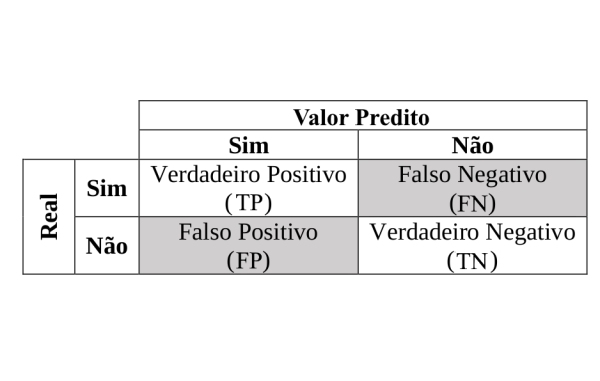

In [ ]:
from sklearn.metrics import confusion_matrix
# imprimir a matriz de confusão
confusion_matrix(y_teste, pred_knn)

array([[2713,  452],
       [ 553, 1766]])

## Curva ROC

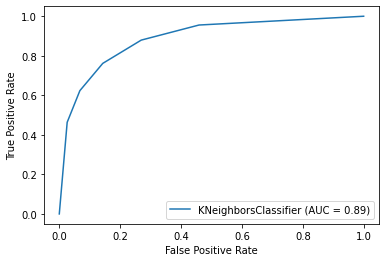

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_knn, X_teste, y_teste)  

## Gráfico de Dispersão

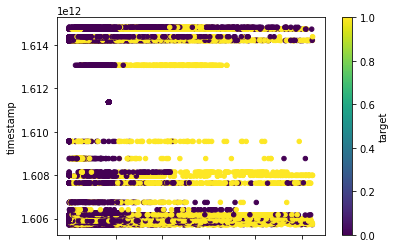

In [ ]:
# gerar gráfico de dispersão
ax2 = df_tratado.plot.scatter(x='angry',
                      y='timestamp',
                      c='target',
                      colormap='viridis')

## Comparação de Resultados



Nessa seção iremos realizar outra comparação utilizando especificamente o algoritmo [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)

In [ ]:
# criar uma instância do classificador KNN com algoritmo BallTree
clf_knn_bt = KNeighborsClassifier(algorithm='ball_tree')

# treinar o classficador
clf_knn_bt.fit(X_treinamento, y_treinamento)

# computar a acurácia do treinamento com o novo algoritmo
pred_knn_bt = clf_knn_bt.predict(X_teste)

print('Acurácia: ', accuracy_score(y_teste, pred_knn_bt))

Acurácia:  0.8167396061269147


# Classificador Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# criar classificador gausseano
clf_gnb = GaussianNB()

# treinar o modelo usando conjuntos de treinamento
clf_gnb.fit(X_treinamento, y_treinamento)

# prever a resposta para o conjunto de teste
pred_gnb = clf_gnb.predict(X_teste)

## Acurácia

In [ ]:
from sklearn import metrics

# calcular a acurácia do modelo, quanto o classificador é correto?
print("Acurácia:",metrics.accuracy_score(y_teste, pred_gnb))

Acurácia: 0.5771334792122538


## Curva ROC

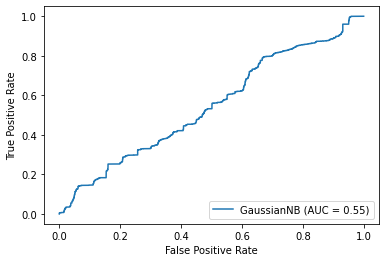

In [ ]:
metrics.plot_roc_curve(clf_gnb, X_teste, y_teste)  

# Classificador Ávore de Decisão

In [ ]:
from sklearn import tree

# instanciar um classificador de Árvore de Decisão
clf_dtc = tree.DecisionTreeClassifier()

In [ ]:
# treinar a árvore de decisão
clf_dtc.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# classificar (prever) saída
pred_dtc = clf_dtc.predict(X_teste)

print("Valor classificado como: ", clf_dtc.predict(X_teste))

Valor classificado como:  [1 0 0 ... 0 1 0]


## Acurácia

In [ ]:
print('Acurácia: ', accuracy_score(y_teste, pred_dtc))

Acurácia:  0.99963530269876


## Curva ROC

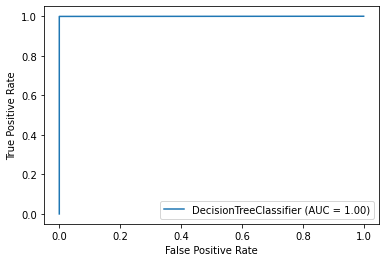

In [ ]:
plot_roc_curve(clf_dtc, X_teste, y_teste)  

[Text(187.09411764705882, 199.32, 'X[4] <= 0.107\ngini = 0.487\nsamples = 12794\nvalue = [7414, 5380]'),
 Text(98.47058823529412, 163.07999999999998, 'X[7] <= 0.1\ngini = 0.412\nsamples = 8762\nvalue = [6223, 2539]'),
 Text(39.38823529411765, 126.83999999999999, 'X[4] <= 0.1\ngini = 0.021\nsamples = 5341\nvalue = [5284, 57]'),
 Text(19.694117647058825, 90.6, 'gini = 0.0\nsamples = 5221\nvalue = [5221, 0]'),
 Text(59.082352941176474, 90.6, 'X[3] <= 0.1\ngini = 0.499\nsamples = 120\nvalue = [63, 57]'),
 Text(39.38823529411765, 54.359999999999985, 'gini = 0.0\nsamples = 63\nvalue = [63, 0]'),
 Text(78.7764705882353, 54.359999999999985, 'gini = 0.0\nsamples = 57\nvalue = [0, 57]'),
 Text(157.5529411764706, 126.83999999999999, 'X[6] <= 0.1\ngini = 0.398\nsamples = 3421\nvalue = [939, 2482]'),
 Text(137.85882352941178, 90.6, 'X[4] <= 0.102\ngini = 0.004\nsamples = 941\nvalue = [939, 2]'),
 Text(118.16470588235295, 54.359999999999985, 'gini = 0.0\nsamples = 934\nvalue = [934, 0]'),
 Text(157.

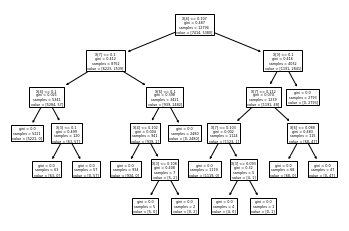

In [ ]:
# imprimir árvore montada pelo classificador
tree.plot_tree(clf_dtc)

In [ ]:
# imprimir a árvore de decisão criada pelo classificador em PDF
from sklearn.externals.six import StringIO
import pydot

nomes_atributo = list(df_tratado.columns[0:9])
nomes_classe = df_tratado.target

# conversão de lista de objetos numpy.int64 para lista de strings
nomes_classe=[str(x) for x in nomes_classe]

dot_data = StringIO()
tree.export_graphviz(clf_dtc,
                     out_file = dot_data,
                     feature_names=nomes_atributo,
                     class_names=nomes_classe,
                     filled=True,
                     rounded=True,
                     impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("game.pdf")

# Classificador Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

# instanciar um classificador Perceptron
clf_perceptron = Perceptron(random_state=42,max_iter=10,tol=0.001)

# treinar o classificador
clf_perceptron.fit(X_treinamento, y_treinamento)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# prever utilizando o conjunto de dados de teste
pred_perceptron = clf_perceptron.predict(X_teste)
print(pred_perceptron)

[0 0 0 ... 0 0 0]


# Classificador MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

# instanciar o classificador do tipo MLP com duas camadas ocultas com cinco neuronios cada
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

print(clf_mlp.fit(X_treinamento, y_treinamento))  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
# print("Pesos entre a entrada e a primeira camada oculta:")
# print(clf_mlp.coefs_[0])
# print("\nPesos entre a primeira camada oculta e a segunda camada oculta:")
# print(clf_mlp.coefs_[1])

In [ ]:
# print("w0 = ", clf_mlp.coefs_[0][0][0])
# print("w1 = ", clf_mlp.coefs_[0][1][0])

In [ ]:
# clf_mlp.coefs_[0][:,0]

In [ ]:
# imprimir os pesos de cada neuronio por camada
# for i in range(len(clf_mlp.coefs_)):
#     number_neurons_in_layer = clf_mlp.coefs_[i].shape[1]
#     for j in range(number_neurons_in_layer):
#         weights = clf_mlp.coefs_[i][:,j]
#         print(i, j, weights, end=", ")
#         print()
#     print()

In [ ]:
# print("Valores de limiar para a primeira camada oculta:")
# print(clf_mlp.intercepts_[0])
# print("\nValores de limiar para a segunda camada oculta:")
# print(clf_mlp.intercepts_[1])

In [ ]:
# Fazer a classificação para o conjunto X_teste
pred_mlp = clf_mlp.predict(X_teste)

print(pred_mlp)

[0 0 0 ... 0 0 0]


In [ ]:
pred_probabilidade = clf_mlp.predict_proba(X_teste)
print(pred_probabilidade)

[[0.57949655 0.42050345]
 [0.57949655 0.42050345]
 [0.57949655 0.42050345]
 ...
 [0.57949655 0.42050345]
 [0.57949655 0.42050345]
 [0.57949655 0.42050345]]


## Acurácia

In [ ]:
print('Acurácia: ', accuracy_score(y_teste, pred_mlp))

Acurácia:  0.5771334792122538


## Curva ROC

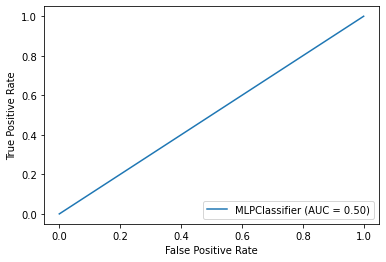

In [ ]:
metrics.plot_roc_curve(clf_mlp, X_teste, y_teste)  